In [89]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import necessary libraries


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [91]:
df=pd.read_csv("/Users/cyberzed/Desktop/updated_cybersecurity_attacks.csv")

# Basic Data Exploration

In [92]:
df.head()

,Unnamed: 0,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,...,Log Source,Browser,Device/OS,Year,Month,Day,Hour,Minute,Second,DayOfWeek
0,0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,...,Server,Mozilla,Windows,2023,5,30,6,33,58,1
1,1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,...,Firewall,Mozilla,Windows,2020,8,26,7,8,30,2
2,2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,...,Firewall,Mozilla,Windows,2022,11,13,8,23,25,6
3,3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,...,Firewall,Mozilla,Macintosh,2023,7,2,10,38,46,6
4,4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,...,Firewall,Mozilla,Windows,2023,7,16,13,11,7,6


In [93]:
df.info() # Dataset Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              40000 non-null  int64  
 1   Timestamp               40000 non-null  object 
 2   Source IP Address       40000 non-null  object 
 3   Destination IP Address  40000 non-null  object 
 4   Source Port             40000 non-null  int64  
 5   Destination Port        40000 non-null  int64  
 6   Protocol                40000 non-null  object 
 7   Packet Length           40000 non-null  int64  
 8   Packet Type             40000 non-null  object 
 9   Traffic Type            40000 non-null  object 
 10  Payload Data            40000 non-null  object 
 11  Malware Indicators      40000 non-null  object 
 12  Anomaly Scores          40000 non-null  float64
 13  Alerts/Warnings         40000 non-null  object 
 14  Attack Type             40000 non-null

In [94]:
df.shape  # Dataset Shape

(40000, 34)

In [95]:
df.describe()   # Statistics
    

,Unnamed: 0,Source Port,Destination Port,Packet Length,Anomaly Scores,Year,Month,Day,Hour,Minute,Second,DayOfWeek
count,40000.00000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,19999.50000,32970.356450,33150.868650,781.452725,50.113473,2021.411375,6.288275,15.629550,11.507350,29.511825,29.591300,2.995750
std,11547.14972,18560.425604,18574.668842,416.044192,28.853598,1.085253,3.332979,8.771715,6.919122,17.360543,17.357387,2.004515
min,0.00000,1027.000000,1024.000000,64.000000,0.000000,2020.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,16850.750000,17094.750000,420.000000,25.150000,2020.000000,3.000000,8.000000,5.000000,14.000000,14.000000,1.000000
50%,19999.50000,32856.000000,33004.500000,782.000000,50.345000,2021.000000,6.000000,16.000000,12.000000,29.000000,30.000000,3.000000
75%,29999.25000,48928.250000,49287.000000,1143.000000,75.030000,2022.000000,9.000000,23.000000,17.000000,45.000000,45.000000,5.000000
max,39999.00000,65530.000000,65535.000000,1500.000000,100.000000,2023.000000,12.000000,31.000000,23.000000,59.000000,59.000000,6.000000


# Data Cleaning

In [96]:
df.isnull().sum()  # Missing Values

Unnamed: 0                0
Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
Browser                   0
Device/OS                 0
Year                      0
Month                     0
Day                       0
Hour                      0
Minute                    0
Second                    0
DayOfWeek                 0
dtype: int64

In [97]:
df.dropna(inplace=True)  # Handling Missing Values

In [98]:
df.isnull().sum()

Unnamed: 0                0
Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
Browser                   0
Device/OS                 0
Year                      0
Month                     0
Day                       0
Hour                      0
Minute                    0
Second                    0
DayOfWeek                 0
dtype: int64

In [99]:
df.shape

(40000, 34)

In [100]:
df.duplicated().sum() 

0

In [101]:
df.head()

,Unnamed: 0,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,...,Log Source,Browser,Device/OS,Year,Month,Day,Hour,Minute,Second,DayOfWeek
0,0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,...,Server,Mozilla,Windows,2023,5,30,6,33,58,1
1,1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,...,Firewall,Mozilla,Windows,2020,8,26,7,8,30,2
2,2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,...,Firewall,Mozilla,Windows,2022,11,13,8,23,25,6
3,3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,...,Firewall,Mozilla,Macintosh,2023,7,2,10,38,46,6
4,4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,...,Firewall,Mozilla,Windows,2023,7,16,13,11,7,6


# Data Visualization

In [102]:
df['Payload Data'].dtype

dtype('O')

In [103]:
# Convert your_data to a string

text = str(df['Payload Data'])  


**Word Cloud**

In [122]:
from wordcloud import WordCloud

In [105]:
from wordcloud import WordCloud

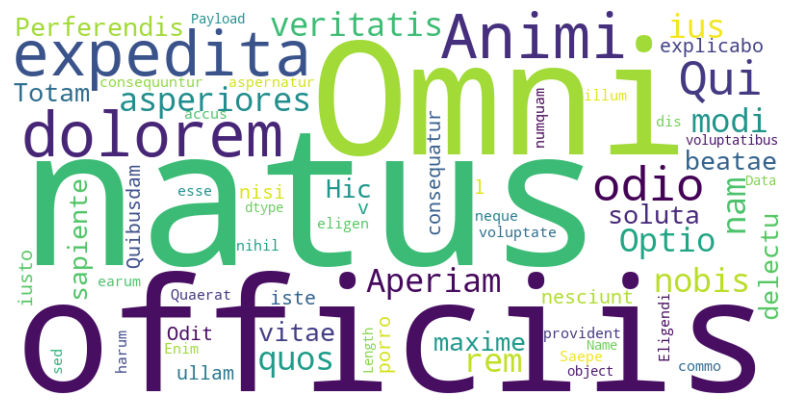

In [106]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Bar Chart**

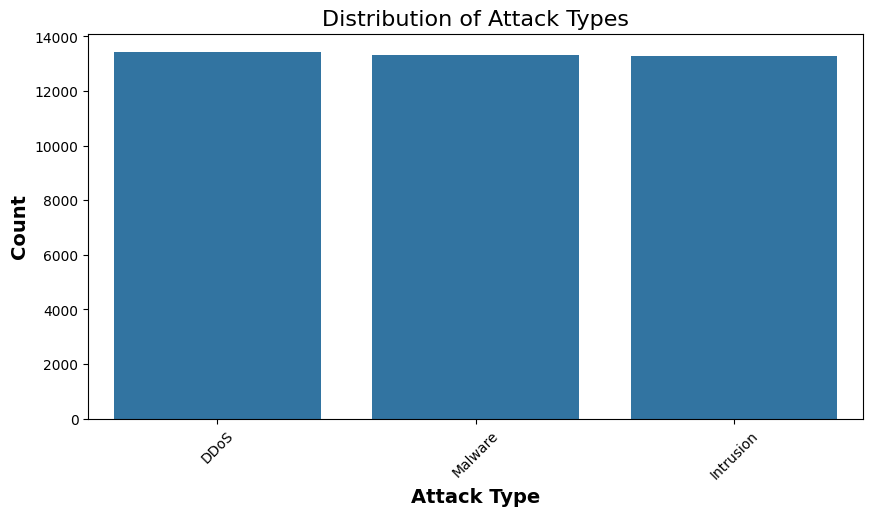

Attack Type
DDoS         13428
Malware      13307
Intrusion    13265
Name: count, dtype: int64


In [107]:
# Visualize the distribution of attack types

attack_counts = df['Attack Type'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=attack_counts.index , y=attack_counts)

plt.xlabel('Attack Type',fontsize=14, fontweight='bold')
plt.ylabel('Count',fontsize=14, fontweight='bold')
plt.title('Distribution of Attack Types', fontsize=16)

plt.xticks(rotation=45)
plt.show()

print(attack_counts)

**Pie Charts**

In [108]:
df['Protocol'].value_counts()

Protocol
ICMP    13429
UDP     13299
TCP     13272
Name: count, dtype: int64

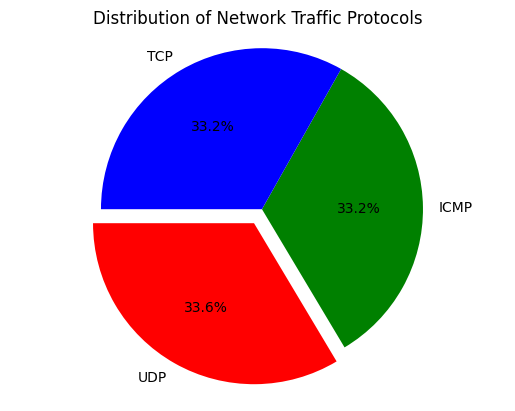

In [109]:
# Data for the pie chart


labels = ['UDP', 'ICMP', 'TCP']
sizes = df['Protocol'].value_counts()  # Proportional sizes of each category
colors = ['red', 'green', 'blue']  # Color for each category segment
explode = (0.1, 0, 0)  # Explode a slice if needed (0 means no explosion)


# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=180)


plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Network Traffic Protocols')


# Display the pie chart
plt.show()


In [110]:
df['Traffic Type'].value_counts()

Traffic Type
DNS     13376
HTTP    13360
FTP     13264
Name: count, dtype: int64

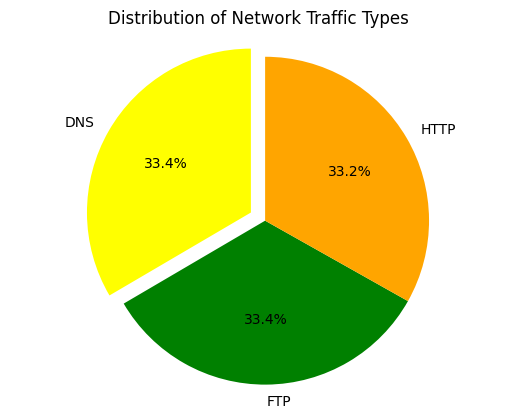

In [111]:
# Data for the pie chart

labels =['DNS','FTP','HTTP']
sizes = df['Traffic Type'].value_counts()
colors = ['yellow', 'green', 'orange']
explode = (0.1, 0, 0) 

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)

plt.axis('equal')  
plt.title('Distribution of Network Traffic Types')

# Display the pie chart
plt.show()

In [112]:
df['Action Taken'].value_counts()

Action Taken
Blocked    13529
Ignored    13276
Logged     13195
Name: count, dtype: int64

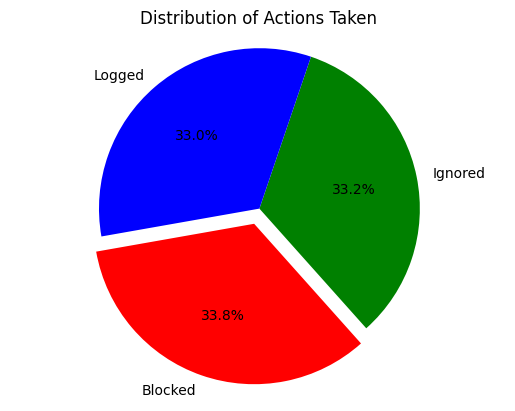

In [113]:
labels =['Blocked','Ignored','Logged']
sizes =df['Action Taken'].value_counts()
colors = ['Red', 'green', 'blue']
explode = (0.1, 0, 0) 


# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=190)

plt.axis('equal')
plt.title('Distribution of Actions Taken')

# Display the pie chart
plt.show()

In [114]:
df['Packet Type'].value_counts()

Packet Type
Control    20237
Data       19763
Name: count, dtype: int64

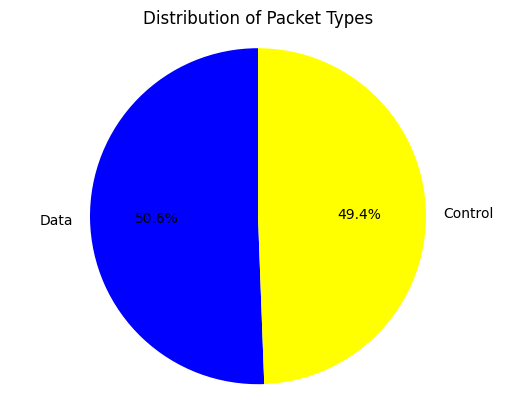

In [115]:
# Data for the pie chart
labels =['Data','Control']
sizes = df['Packet Type'].value_counts() 
colors = ['blue', 'yellow']
explode = (0, 0) 

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)


plt.axis('equal') 
plt.title('Distribution of Packet Types')

# Display the pie chart
plt.show()

In [116]:
df['Severity Level'].value_counts()

Severity Level
Medium    13435
High      13382
Low       13183
Name: count, dtype: int64

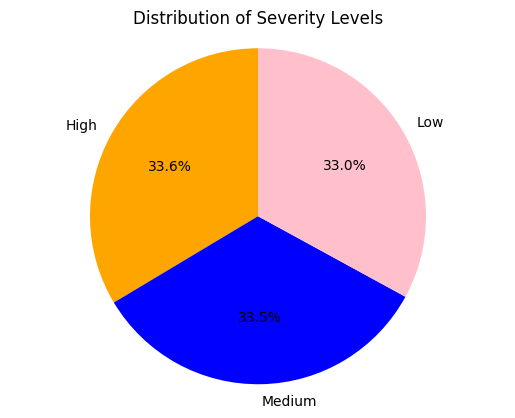

In [117]:
# Data for the pie chart
labels =['High','Medium','Low']
sizes =df['Severity Level'].value_counts()
colors = ['orange', 'blue','pink'] 
explode = (0, 0,0)

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)

plt.axis('equal') 
plt.title('Distribution of Severity Levels')

# Display the pie chart
plt.show()

In [118]:
df['Log Source'].value_counts()

Log Source
Firewall    20116
Server      19884
Name: count, dtype: int64

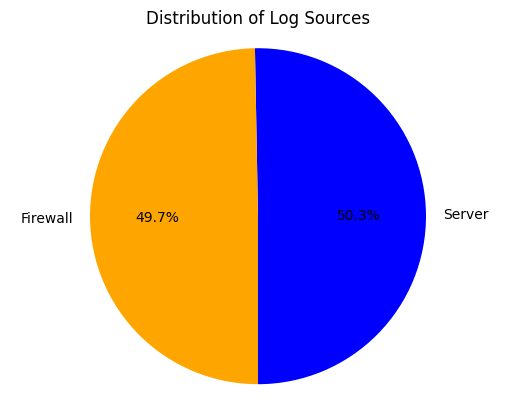

In [120]:

labels =['Server','Firewall']
sizes =df['Log Source'].value_counts()  
colors = ['blue', 'orange']
explode = (0, 0) 

plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=270)

plt.axis('equal')
plt.title('Distribution of Log Sources')

# Display the pie chart
plt.show()